In [1]:
%load_ext autoreload
%autoreload 2

import nest
import numpy as np
import params
from math import degrees
import matplotlib.pyplot as plt
from nest_tools import Network, SpikeRecording
import mnist_tools

mnist_tools.ensure_path('preparation')

network = Network()
network.reset_nest()
network.setup_static_network()
network.record_spikes('preparation/rate_modulation')


######### rate 15000.000000000004


In [2]:
def rate_for_angle(angle, tuned_angle):
    mu = 0.1
    return 1+mu*np.cos(2*(angle-tuned_angle))

tuned_angles = np.linspace(0,np.pi, params.NE)

# used for captions - angles in degrees
angles_degrees = list(map(degrees, tuned_angles))

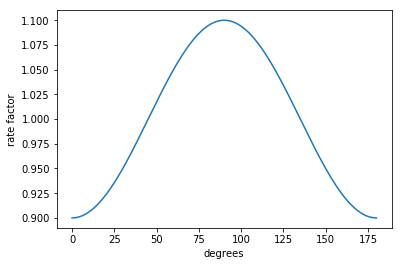

In [3]:
plt.plot(angles_degrees, rate_for_angle(tuned_angles, np.pi/2))
plt.xlabel('degrees')
plt.ylabel('rate factor')

In [4]:
stimulus_count = 20
duration = 1000.0
stimuli = np.linspace(0,np.pi, stimulus_count)

for current_angle in stimuli:
    print("Input angle:", degrees(current_angle), "deg")

    # set rate for every neuron
    for i in range(params.NE):
        rate_factor = rate_for_angle(current_angle, tuned_angles[i])
        network.set_rate([i+1], params.rate * rate_factor)

    print("Simulating for", duration)
    nest.Simulate(duration)

network.save_recording('preparation/rate_modulation')
print('done')

Input angle: 0.0 deg
Simulating for 1000.0
Input angle: 9.473684210526315 deg
Simulating for 1000.0
Input angle: 18.94736842105263 deg
Simulating for 1000.0
Input angle: 28.421052631578945 deg
Simulating for 1000.0
Input angle: 37.89473684210526 deg
Simulating for 1000.0
Input angle: 47.36842105263158 deg
Simulating for 1000.0
Input angle: 56.84210526315789 deg
Simulating for 1000.0
Input angle: 66.3157894736842 deg
Simulating for 1000.0
Input angle: 75.78947368421052 deg
Simulating for 1000.0
Input angle: 85.26315789473684 deg
Simulating for 1000.0
Input angle: 94.73684210526316 deg
Simulating for 1000.0
Input angle: 104.21052631578948 deg
Simulating for 1000.0
Input angle: 113.68421052631578 deg
Simulating for 1000.0
Input angle: 123.1578947368421 deg
Simulating for 1000.0
Input angle: 132.6315789473684 deg
Simulating for 1000.0
Input angle: 142.10526315789474 deg
Simulating for 1000.0
Input angle: 151.57894736842104 deg
Simulating for 1000.0
Input angle: 161.05263157894737 deg
Simul

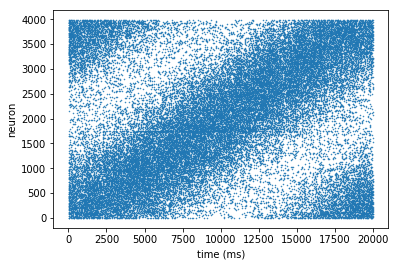

In [5]:
recording = SpikeRecording.from_file('preparation/rate_modulation')


# raster plot - consider every 20th neuron of excitatory population (first 4000 neurons)
recording.plot(neurons=range(1,4000,20))


In [6]:
# generates a matrix (#neurons x #time_range) containing
# firing rate of neuron in the respective range
def rate_profiles(neurons, time_ranges):
    # prepare matrix
    result = np.zeros((len(neurons), len(time_ranges)))

    for i, (start, end) in enumerate(time_ranges):    
        # get rates for all neurons in current time range
        rates = recording.rate(neurons, start, end)

        # store rates in i-th column
        result[:,i] = np.array(rates)

    return result


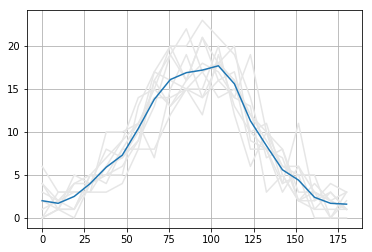

In [7]:
# used for captions - angles in degrees
stimuli_degrees = list(map(degrees, stimuli))

# time ranges of stimuli: [[0,1000], [1000,2000], ...]
time_ranges = [[i*1000, (i+1)*1000] for i in range(stimulus_count)]

# let's inspect neurons 2000 - 2010 - tuned approx to 90 deg
neuron_ids = list(range(2000, 2010))

# get rate matrix for neurons and time ranges
profiles = rate_profiles(neuron_ids, time_ranges)

# plot neuron profiles
for profile in profiles:
    plt.plot(stimuli_degrees, profile, color=(0.9, 0.9, 0.9)) 

# plot mena over profiles
plt.plot(stimuli_degrees, np.mean(profiles, axis=0))

# add grid
plt.grid()

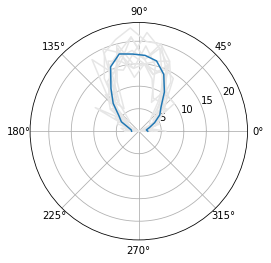

In [8]:
plt.subplot(111, projection="polar")
for profile in profiles:
    plt.plot(stimuli, profile, color=(0.9, 0.9, 0.9)) 
plt.plot(stimuli, np.mean(profiles, axis=0))
plt.grid(True)